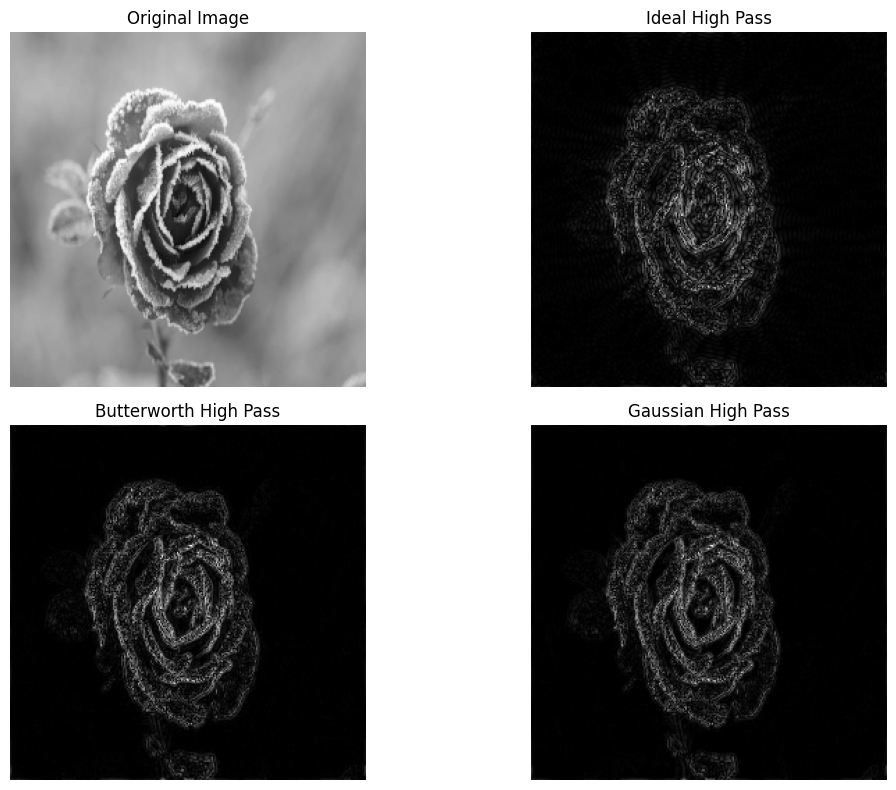

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ----- High-pass filters -----
def ideal_highpass(shape, cutoff):
    P, Q = shape
    u = np.arange(P)
    v = np.arange(Q)
    U, V = np.meshgrid(v - Q//2, u - P//2)
    D = np.sqrt(U**2 + V**2)
    H = np.float32(D > cutoff)   # opposite of low-pass
    return H

def butterworth_highpass(shape, cutoff, order=2):
    P, Q = shape
    u = np.arange(P)
    v = np.arange(Q)
    U, V = np.meshgrid(v - Q//2, u - P//2)
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (cutoff / (D + 1e-5))**(2*order))  # avoid division by zero
    return H

def gaussian_highpass(shape, cutoff):
    P, Q = shape
    u = np.arange(P)
    v = np.arange(Q)
    U, V = np.meshgrid(v - Q//2, u - P//2)
    D2 = U**2 + V**2
    H = 1 - np.exp(-D2 / (2*(cutoff**2)))
    return H

# ----- Apply filter in frequency domain -----
def apply_filter(img, H):
    # DFT
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)

    # Apply filter
    G = dft_shift * H

    # Inverse FFT
    G_ishift = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(G_ishift)
    img_back = np.abs(img_back)
    return img_back

# ----- Main program -----
def frequency_domain_highpass(image_path, cutoff=30):
    # Load grayscale image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError("Image not found. Check path!")

    img = cv2.resize(img, (256, 256))  # standard size
    shape = img.shape

    # Create filters
    H_ideal = ideal_highpass(shape, cutoff)
    H_butterworth = butterworth_highpass(shape, cutoff, order=2)
    H_gaussian = gaussian_highpass(shape, cutoff)

    # Apply filters
    img_ideal = apply_filter(img, H_ideal)
    img_butterworth = apply_filter(img, H_butterworth)
    img_gaussian = apply_filter(img, H_gaussian)

    # Display results
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
    plt.title("Original Image"), plt.axis("off")

    plt.subplot(2, 2, 2), plt.imshow(img_ideal, cmap='gray')
    plt.title("Ideal High Pass"), plt.axis("off")

    plt.subplot(2, 2, 3), plt.imshow(img_butterworth, cmap='gray')
    plt.title("Butterworth High Pass"), plt.axis("off")

    plt.subplot(2, 2, 4), plt.imshow(img_gaussian, cmap='gray')
    plt.title("Gaussian High Pass"), plt.axis("off")

    plt.tight_layout()
    plt.savefig("highpass_filters_comparison.png")
    plt.show()

# Example usage
if __name__ == "__main__":
    frequency_domain_highpass("/content/Frozen Rose.jpg", cutoff=40)